<a href="https://colab.research.google.com/github/Soumi7/TFNotebooks/blob/master/DL_PG_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
df=pd.read_csv("drive/My Drive/GROUP_OF_DATASETS/CHEMISTRY.csv")

In [138]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date', 'ishol/week', 'group', 'name',
       'quantity', 'unit_cogs', 'monthly_Avgtemp', 'monthly_avg_FeelsLikeC',
       'monthly_avg_HeatIndexC', 'monthly_avg_cloudcover',
       'monthly_avg_humidity'],
      dtype='object')

In [139]:
df['quantity'].describe()

count    2152.000000
mean        4.530158
std         9.761890
min         0.200000
25%         1.000000
50%         2.000000
75%         3.000000
max       120.000000
Name: quantity, dtype: float64

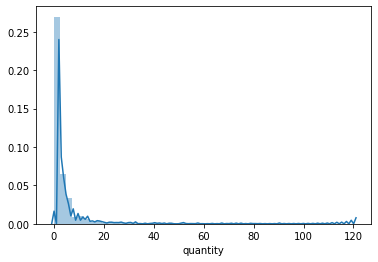

In [140]:
import seaborn as sns
sns.distplot(df['quantity'])

In [141]:
df['quantity'].skew()

6.102735329529392

In [142]:
df['quantity'].kurt()

47.641620762279814

In [0]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1','group'],axis=1)

In [0]:
df=df.drop(['date'],axis=1)

In [145]:
df.columns

Index(['ishol/week', 'name', 'quantity', 'unit_cogs', 'monthly_Avgtemp',
       'monthly_avg_FeelsLikeC', 'monthly_avg_HeatIndexC',
       'monthly_avg_cloudcover', 'monthly_avg_humidity'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [147]:
train

,ishol/week,name,quantity,unit_cogs,monthly_Avgtemp,monthly_avg_FeelsLikeC,monthly_avg_HeatIndexC,monthly_avg_cloudcover,monthly_avg_humidity
1379,10,FAIRY 500 ML CYTRYNA,4.0,2.69,15.835,14.73,2,1,69.23
1481,10,SILAN 1_85 ORANGE,1.0,8.16,15.835,14.73,2,1,69.23
2095,12,REKLAMOWKA Z UCHWYTEM,11.0,0.36,0.370,-3.61,1,3,88.58
1851,9,PEDZLE ZESTAW 6 SZT,1.0,2.95,3.970,0.77,1,1,80.60
95,9,PLATKI BELLA OKRAGLE 120,1.0,2.09,-0.420,-4.84,1,2,82.81
...,...,...,...,...,...,...,...,...,...
688,11,PASTA DO ZEB COLODENT STRONG,1.0,2.10,15.965,15.42,2,0,73.23
356,9,NOTES DO DZIEWCZYNKI,1.0,2.59,0.165,-4.03,1,2,73.23
872,9,PERWOL 900 ML RENEW KOLOR,2.0,6.29,17.065,17.10,2,1,72.30
1648,8,PATYCZKI HIGIENICZNE 200 SZT MEA,3.0,1.35,10.710,8.19,1,1,71.65


In [0]:
target=train.quantity

In [149]:
corrmatrix= df.corr()
print(corrmatrix)

                        ishol/week  ...  monthly_avg_humidity
ishol/week                1.000000  ...              0.453348
quantity                 -0.001503  ...             -0.007148
unit_cogs                 0.044564  ...              0.022351
monthly_Avgtemp          -0.038260  ...             -0.670414
monthly_avg_FeelsLikeC   -0.034126  ...             -0.664323
monthly_avg_HeatIndexC    0.207298  ...             -0.462751
monthly_avg_cloudcover    0.267031  ...              0.743852
monthly_avg_humidity      0.453348  ...              1.000000

[8 rows x 8 columns]


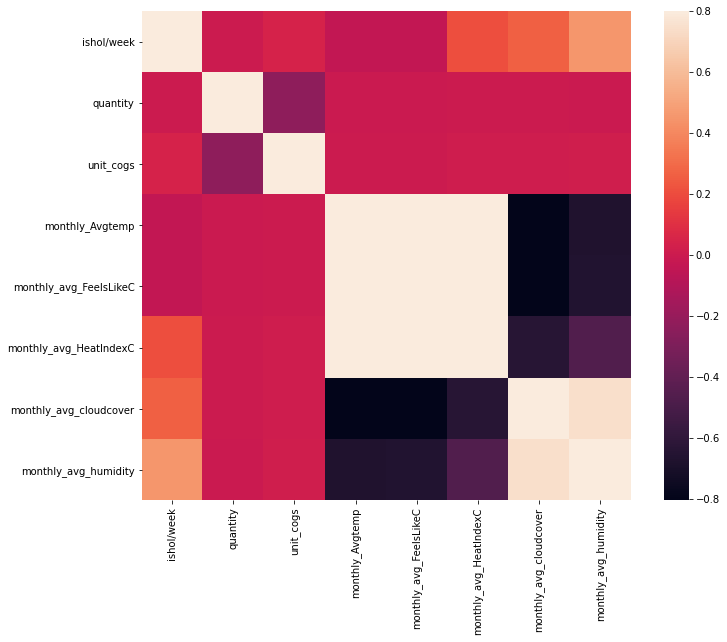

In [150]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmatrix, vmax=.8, square=True)

In [151]:
print(train.shape)
train=train.drop(['name'],axis=1)

(1721, 9)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_error

In [153]:
CNN_model = Sequential()
CNN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
CNN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
CNN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
CNN_model.add(Dense(256,kernel_initializer='normal',activation='relu'))
CNN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
CNN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
CNN_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [155]:
train.columns

Index(['ishol/week', 'quantity', 'unit_cogs', 'monthly_Avgtemp',
       'monthly_avg_FeelsLikeC', 'monthly_avg_HeatIndexC',
       'monthly_avg_cloudcover', 'monthly_avg_humidity'],
      dtype='object')

In [156]:
train.dtypes

ishol/week                  int64
quantity                  float64
unit_cogs                 float64
monthly_Avgtemp           float64
monthly_avg_FeelsLikeC    float64
monthly_avg_HeatIndexC      int64
monthly_avg_cloudcover      int64
monthly_avg_humidity      float64
dtype: object

In [157]:
len(train)

1721

In [158]:
len(target)

1721

In [159]:
CNN_model.fit(train, target, epochs=500, batch_size=100, validation_split = 0.2, callbacks=callbacks_list)

Train on 1376 samples, validate on 345 samples
Epoch 1/500
1376/1376 [==============================] - 1s 554us/step - loss: 3.3560 - mean_absolute_error: 3.3560 - val_loss: 3.0528 - val_mean_absolute_error: 3.0528

Epoch 00001: val_loss improved from inf to 3.05283, saving model to Weights-001--3.05283.hdf5
Epoch 2/500
1376/1376 [==============================] - 0s 83us/step - loss: 2.7415 - mean_absolute_error: 2.7415 - val_loss: 1.7799 - val_mean_absolute_error: 1.7799

Epoch 00002: val_loss improved from 3.05283 to 1.77994, saving model to Weights-002--1.77994.hdf5
Epoch 3/500
1376/1376 [==============================] - 0s 81us/step - loss: 1.1137 - mean_absolute_error: 1.1137 - val_loss: 0.5070 - val_mean_absolute_error: 0.5070

Epoch 00003: val_loss improved from 1.77994 to 0.50698, saving model to Weights-003--0.50698.hdf5
Epoch 4/500
1376/1376 [==============================] - 0s 85us/step - loss: 0.6189 - mean_absolute_error: 0.6189 - val_loss: 0.3847 - val_mean_absolute_e